## Observations and Insights 

In [ ]:
#Observations
- It is clearly evident that Capamouline is working better when compared to other drug regimens in this study except Ramicane.
- Most of the metastatic sites are in Female population
- Ramicane is definitely having better results with the similar kind of sample size

In [1]:
!pip install matplotlib

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_study = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
mice_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
unique_miceid = mice_study["Mouse ID"].unique()
unique_micelist = len(unique_miceid)
unique_micelist

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_micebyid = mice_study[mice_study.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_micebyid

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = mice_study[mice_study["Mouse ID"]=="g989"]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_cleandf = mice_study.drop(mice_study[mice_study["Mouse ID"]=="g989"].index)
mice_cleandf.reset_index(inplace=True)

In [7]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(mice_cleandf)
number_of_mice

1880

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = mice_cleandf.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = mice_cleandf.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = mice_cleandf.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
standard_deviation = mice_cleandf.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
standard_error = mice_cleandf.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
summary_table = pd.DataFrame({"Mean":mean,
                            "Median":median,
                            "Variance":variance,
                            "Standard Deviation":standard_deviation,
                             "SEM":standard_error,
                             })
summary_table


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
Summary_aggregate = mice_study.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
Summary_aggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

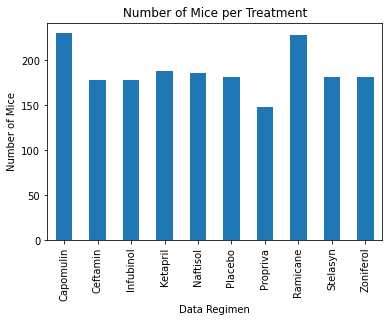

In [40]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_tested = mice_cleandf.groupby("Drug Regimen").count()["Mouse ID"]
mice_tested.plot(kind="bar")

plt.xlabel("Data Regimen")

plt.ylabel("Number of Mice")

plt.title("Number of Mice per Treatment")
                 

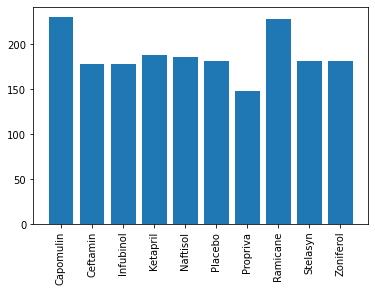

In [42]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(mice_tested.index.values, mice_tested.values)
plt.xticks(rotation=90)
plt.show()


Sex
Female    922
Male      958
Name: Sex, dtype: int64

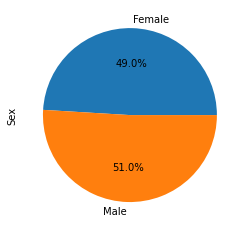

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

distribution_of_sex = mice_cleandf.groupby(["Sex"])["Sex"].count()
distribution_of_sex.plot(kind = "pie",autopct="%1.1f%%")
distribution_of_sex

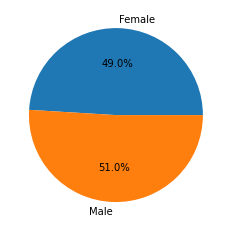

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(distribution_of_sex.values, labels=distribution_of_sex.index.values,autopct="%1.1f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = mice_cleandf.groupby(["Mouse ID"])["Timepoint"].max()
greatest_timepoint = greatest_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_tumor_volume = pd.merge(greatest_timepoint,mice_cleandf,on=["Mouse ID", "Timepoint"],how="left")
merge_tumor_volume


,Mouse ID,Timepoint,index,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,463,Infubinol,Female,20,23,67.973419,2
1,a251,45,473,Infubinol,Female,21,25,65.525743,1
2,a262,45,483,Placebo,Female,17,29,70.717621,4
3,a275,45,493,Ceftamin,Female,20,28,62.999356,3
4,a366,30,500,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...,...
243,z435,10,1862,Propriva,Female,12,26,48.710661,0
244,z578,45,84,Ramicane,Male,11,16,30.638696,0
245,z581,45,1872,Infubinol,Female,24,25,62.754451,3
246,z795,45,1882,Naftisol,Female,13,29,65.741070,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
all_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in all_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merge_tumor_volume.loc[merge_tumor_volume["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
     # add subset 
    tumor_vol_data.append(tumor_volume)
  # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]

    print(f"<>\n",
          f"For the {drug} Regimen: \n",
          f"- The tumor's volume lower bound: {round(lowerq,2)}\n",
          f"- The tumor's volume upper bound: {round(upperq,2)}\n",
          f"- The tumor's volume IQR: {round(iqr,2)}\n",
          '----------------------------------------------------------------- \n',
          f"    - Final tumor's lower boud volume(mm3) for {drug} below {round(lower_bound,2)} could be outliers. \n",
          f"    - Final tumor volume(mm3) for {drug} above {round(upper_bound,2)} could be outliers. \n"
          f"     - Number of outliers for {drug} is: {outlier.count()}\n"
          '-----------------------------------------------------------------',)
    if outlier.count() > 0:
        for i in outlier.index:
            print(f'# Outlier final tumor volume(mm3) is {round(outlier[i], 2)}\n')    
   
     

<>
 For the Capomulin Regimen: 
 - The tumor's volume lower bound: 32.38
 - The tumor's volume upper bound: 40.16
 - The tumor's volume IQR: 7.78
 ----------------------------------------------------------------- 
     - Final tumor's lower boud volume(mm3) for Capomulin below 20.7 could be outliers. 
     - Final tumor volume(mm3) for Capomulin above 51.83 could be outliers. 
     - Number of outliers for Capomulin is: 0
-----------------------------------------------------------------
<>
 For the Ramicane Regimen: 
 - The tumor's volume lower bound: 31.56
 - The tumor's volume upper bound: 40.66
 - The tumor's volume IQR: 9.1
 ----------------------------------------------------------------- 
     - Final tumor's lower boud volume(mm3) for Ramicane below 17.91 could be outliers. 
     - Final tumor volume(mm3) for Ramicane above 54.31 could be outliers. 
     - Number of outliers for Ramicane is: 0
-----------------------------------------------------------------
<>
 For the Infubino

{'whiskers': [<matplotlib.lines.Line2D at 0x2c3e50ec8c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2c3e5101648>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c3e50fd148>,
 'medians': [<matplotlib.lines.Line2D at 0x2c3e5101e88>,
 'fliers': [<matplotlib.lines.Line2D at 0x2c3e5107bc8>,
 'means': []}

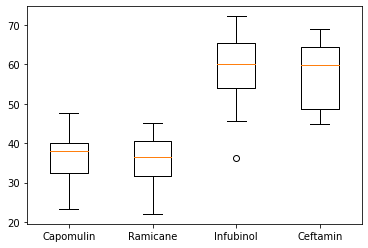

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data, labels= all_regimens)

## Line and Scatter Plots

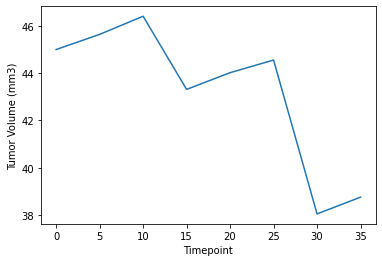

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mice = mice_cleandf.loc[mice_cleandf["Drug Regimen"] == "Capomulin"]

mouse_id = capomulin_mice.loc[mice_cleandf["Mouse ID"] == "j246"] 
x = mouse_id["Timepoint"] 
y = mouse_id["Tumor Volume (mm3)"] 
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x,y)

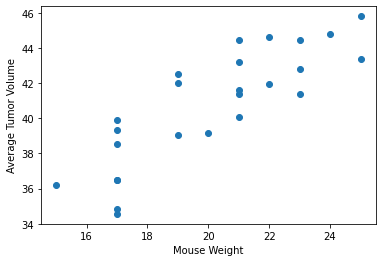

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_average = capomulin_mice.groupby("Mouse ID").mean()
x = capomulin_average["Weight (g)"]
y = capomulin_average["Tumor Volume (mm3)"]

plt.scatter(x,y)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

## Correlation and Regression

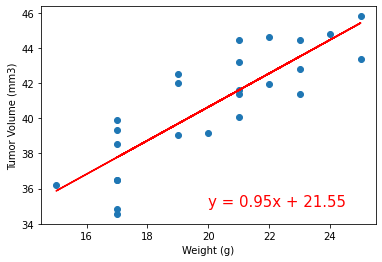

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = capomulin_average["Weight (g)"]
y = capomulin_average["Tumor Volume (mm3)"]
corr=round(st.pearsonr(x,y)[0],2)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()